In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [3]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))

학습셋 이미지 수: 60000 개


In [4]:
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

테스트셋 이미지 수: 10000 개


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

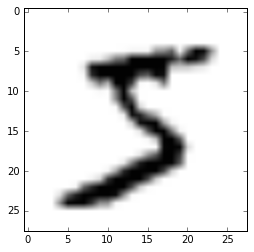

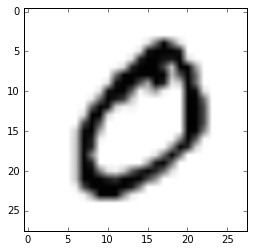

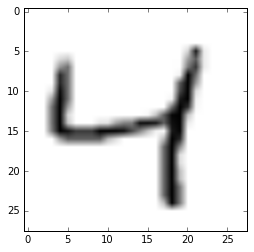

In [18]:
for i in range(len(X_train))[:3]:
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

In [19]:
import sys

In [20]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%d\t" % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [33]:
print(X_train[0].shape)
for x in X_train[0]:
    for i in x:
        print("%d\t" % i, end='')
    print('')

(28, 28)
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	

In [34]:
def change(n):
    if n > 0:
        return 255

In [38]:
print(list(map(lambda x: x+1, [1,2,3,[4,5,6]])))

TypeError: can only concatenate list (not "int") to list

In [45]:
map(lambda n: n+255 , [0,1,2])

In [52]:
(lambda n: 255  if n > 0 else n)(1)

255

In [55]:
print(list(map(lambda n: 255 if n > 0 else n, [0,243,0])))

[0, 255, 0]


In [62]:
temp =np.array([list(k) for k in list(map(lambda n: map(lambda x: 255 if x>0 else x, n), X_train[0]))])

In [63]:
temp.shape

(28, 28)

In [64]:
for i in temp:
    for j in i:
        print("%d\t" % j, end='')
    print()

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	255	255	255	255	255	255	255	255	255	255	255	255	0	0	0	0	
0	0	0	0	0	0	0	0	255	255	255	255	255	255	255	255	255	255	255	255	255	255	255	255	0	0	0	0	
0	0	0	0	0	0	0	255	255	255	255	255	255	255	255	255	255	255	255	255	255	255	255	0	0	0	0	0	
0	0	0	0	0	0	0	255	255	255	255	255	255	255	255	255	255	255	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	255	255	255	255	255	255	255	0	255	255	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	255	255	255	255	255	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	255	255	255	255	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	255	255	255	255	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	255	255	255	255	255	255	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	255	255	25

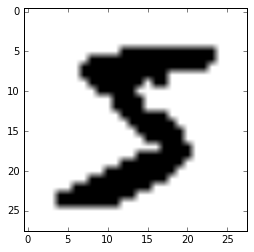

In [66]:
plt.imshow(temp, cmap='Greys')
plt.show()

In [67]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [68]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [69]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [70]:
print("class : %d " % (Y_class_train[0]))

class : 5 


In [71]:
11943 / 1024

11.6630859375

In [74]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [75]:
print(Y_train[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [81]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])